In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hiringdetails = pd.read_csv('C:/Users/gauravn/Desktop/Capstone4_HRData/HR_Hiring_details_transaction.csv')
joiningstatus = pd.read_csv('C:/Users/gauravn/Desktop/Capstone4_HRData/Joining_Status.csv')
locationmaster = pd.read_excel('C:/Users/gauravn/Desktop/Capstone4_HRData/Location_Master.xlsx')
regionlocationmapping = pd.read_excel('C:/Users/gauravn/Desktop/Capstone4_HRData/Region_Location_Mapping.xlsx')
regionmaster = pd.read_excel('C:/Users/gauravn/Desktop/Capstone4_HRData/Region_Master.xlsx')
domicile_master = pd.read_excel('C:/Users/gauravn/Desktop/Capstone4_HRData/Domicile_Master.xlsx')


In [3]:
hiringdetails.head()

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,201301,27.0,2,D10
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21


In [4]:
del hiringdetails['Postal_Code']
del hiringdetails['LOB_Id']
del hiringdetails['Sno']

In [5]:
hiringdetails['Offered_Band'].fillna('E1',inplace=True)
hiringdetails['Age'].fillna(34.0,inplace=True)

In [6]:
hire_merge=hiringdetails.merge(locationmaster,on='Location_ID')

In [7]:
hmerge = hire_merge.merge(joiningstatus,on='Candidate_Ref')

In [8]:
hmerge.isna().sum()

Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Age                             0
Domicile_Id                     0
Location                        0
Status                          0
dtype: int64

In [9]:
for x in hmerge.index:
    hmerge['Percent_difference_CTC'] = hmerge['Percent_hike_expected_in_CTC'] - hmerge['Percent_hike_offered_in_CTC']


In [10]:
hmerge['Percent_hike_expected_in_CTC']=abs(hmerge[['Percent_hike_expected_in_CTC']])
hmerge['Percent_hike_offered_in_CTC']=abs(hmerge[['Percent_hike_offered_in_CTC']])

In [11]:
hmerge.head()

,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Age,Domicile_Id,Location,Status
0,2110407,Yes,14,30,E2,20.79,13.16,-33.95,No,No,Female,Agency,7,L001,34.0,D6,Noida,Joined
1,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,27.0,D10,Noida,Joined
2,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,34.0,D3,Noida,Joined
3,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,34.0,D21,Noida,Joined
4,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,L001,34.0,D24,Noida,Joined


# Q1. Analysis of percentage joined

In [18]:
count_not_joined = 0
for i in range(len(hmerge['Status'])):
    if hmerge['Status'][i] == 'Not Joined':
        count_not_joined += 1


temp=(1-(count_not_joined)/i)*100

print("Percentage of candidates who accepted the offer are: ",round(temp,2),"%")
print("Percentage of candidates who rejected the offer are: ",round(100-temp,2),"%")

Percentage of candidates who accepted the offer are:  81.27 %
Percentage of candidates who rejected the offer are:  18.73 %


# Q2. 	What are the key drivers that influence the candidate joining/not joining a company?

 #### Performing the Anova test onthe joining bonus and Status

Ho - Percent hike is same for 'Joined' and 'Not Joined'
H1 - Percent hike is different

In [19]:
import scipy.stats as st
p_exp = hmerge[hmerge.Status=='Joined']['Percent_hike_offered_in_CTC']
p_off = hmerge[hmerge.Status=='Not Joined']['Percent_hike_offered_in_CTC']

In [22]:
test_stat, p_value = st.f_oneway(p_exp,p_off)
print('test statistic =%4f,p value=%5f'%(test_stat,p_value))
print("Mean percent hike offered: ",hmerge['Percent_hike_offered_in_CTC'].mean())

test statistic =8.330142,p value=0.003909
Mean percent hike offered:  42.080103540414


<AxesSubplot:xlabel='Status', ylabel='Percent_hike_offered_in_CTC'>

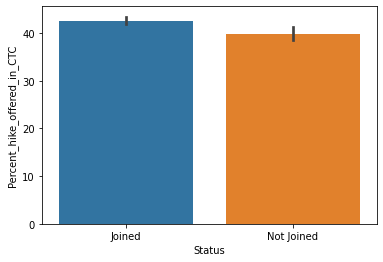

In [23]:
sns.barplot(data=hmerge,x='Status',y='Percent_hike_offered_in_CTC')

alpha value is 0.05. 

####  INFERENCE:
Since the derived p-value(0.0039) which is less than alpha. We fail to accept the Null hypothesis. Hence, alternate hypothesis is accepted. Percent hike offered in CTC is different for candidates who end up joining the firm than that of those who do not join. Hence, percent hike offered in CTC has an influence on candidate joining or not joining the firm.

#### 2. Performing Chi-Square test on the notice period and status to check whether they are related.
 
 1. H0 - mean duration to accept offer is not same 
 2. H1 - mean duration to accept offer is same for both 'joined' and 'not joined'. 

In [24]:
notice_p = hmerge[['Notice_Period','Status']]
notice_p['Status'] = notice_p['Status'].map({'Joined':1,'Not Joined':2})

C:\Users\gauravn\AppData\Local\Temp/ipykernel_19176/1213361667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notice_p['Status'] = notice_p['Status'].map({'Joined':1,'Not Joined':2})


In [25]:
from scipy.stats import chi2_contingency
stat,p_value,dof,expected = chi2_contingency(notice_p)
alpha = 0.05
if p_value <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (accept H0)')

Dependent (Reject H0)


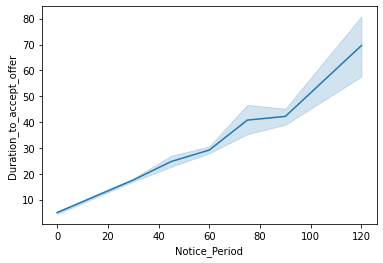

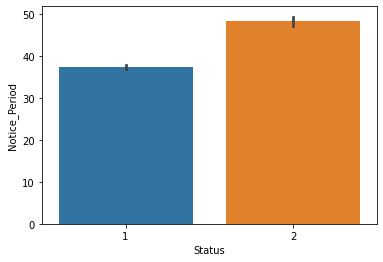

In [36]:
sns.lineplot(x=hmerge['Notice_Period'], y=hmerge['Duration_to_accept_offer'], data=hmerge)
plt.show()
sns.barplot(y=notice_p['Notice_Period'], x=notice_p['Status'], data=notice_p)
plt.show()

#### INFERENCE:

p- value is greater than alpha value. Hence the H0(Null hypothesis) is accepted.


We plotted a graph of "Notice Period" v/s "Duration to accept offer". It is observed that, candidates who have a longer notice period, tend to take a long time to accept the offer. 


At last we perform the Chi square test and found out that the p-value is less than the alpha value. Hence Null Hypothesis is rejected. This means Notice Period has an impact on the joining status



#### 3. Analyzing percent hike offered and expected on status of joining

C:\Users\gauravn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percent_hike_expected_in_CTC', ylabel='Percent_hike_offered_in_CTC'>

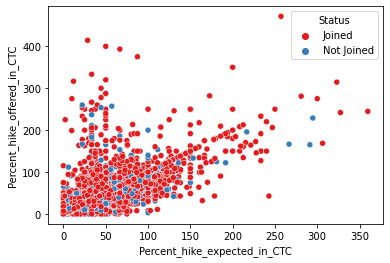

In [28]:
sns.scatterplot(hmerge['Percent_hike_expected_in_CTC'],hmerge['Percent_hike_offered_in_CTC'],hue=hmerge['Status'],
               palette='Set1')

#### Inference: 

Percentage of hike accepted and percentage of hike offered by the company seems to be neutral and yet there is a positive correlation. There are more number of joinings when the hike expected and hike offered match.

#### 4. Analyzing the percent hike offered and offered band on status

C:\Users\gauravn\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='Percent_hike_offered_in_CTC'>

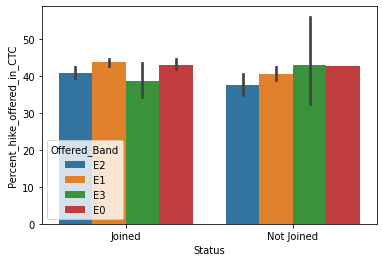

In [29]:
sns.barplot(hmerge['Status'],hmerge['Percent_hike_offered_in_CTC'],hue=hmerge['Offered_Band'])

#### INFERENCE:

There is a more number of joining in E1 band with the percentage of hike offered nearly 40% to 45% and also E3 band has the least number of joining out of all bands with the hike offered nearly 35% to 40%.

Number of not joinings in both E0 and E3 band is same while there is avariation between E1 and E2.
Both joining and not joining candidates has been offered a good percentage hike. but even then the reason for not joining may be beacuse of the preffered band not getting.

# Q3. Are there specific locations where candidates are not joining?

In [37]:
loct=hmerge[['Location','Status']]
l1=loct.groupby('Status')
l2=l1.get_group('Not Joined')
print(l2['Location'].unique())


['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Mumbai' 'Ahmedabad']


# Q4. Joining status depends on the duration to accept an offer?

1. H0 - Mean of 'Duration to accept offer' is same for both people Joined and not Joined

2. H1 - Mean of 'Duration to accept offer' is not same for both people Joined and not Joined

#### Use Anova testing

In [42]:
hr=hmerge[['Duration_to_accept_offer','Status']]
hr

,Duration_to_accept_offer,Status
0,14,Joined
1,3,Joined
2,26,Joined
3,1,Joined
4,17,Joined
...,...,...
8977,0,Joined
8978,1,Joined
8979,0,Joined
8980,0,Joined


In [39]:
an1 = hmerge[hr.Status=='Joined']['Duration_to_accept_offer']
an2 = hmerge[hr.Status=='Not Joined']['Duration_to_accept_offer']

In [40]:
test_stat, p_value = st.f_oneway(an1,an2)
print('test statistic =%4f,p value=%5f'%(test_stat,p_value))

test statistic =38.299910,p value=0.000000


#### Inference: Inference - The p-value is less than alpha value, hence we accept the alternate hypothesis. Hence, mean of duration to accept offer is different for both people joined and not joined. So, we can say that, duration to accept the offer impacts the joining status.

   

# Q4. 	Hike offered has an impact on joining status.? 

Anova Hypothesis: 
1.    Ho - Percent hike is same for 'Joined' and 'Not Joined'
2.    H1 - Percent hike is different
3.    alpha value = 0.05

In [43]:
hop1 = hmerge[hmerge.Status=='Joined']['Percent_hike_offered_in_CTC']
hop2 = hmerge[hmerge.Status=='Not Joined']['Percent_hike_offered_in_CTC']

In [44]:
test_stat, p_value = st.f_oneway(hop1,hop2)
print('test statistic =%4f,p value=%5f'%(test_stat,p_value))

test statistic =8.330142,p value=0.003909


#### Inference: As the p-value is less than the alpha value, we accept the alternate hypothesis. Hence, we can say that, percent hike offered in CTC impacts the candidate's decision to join or  not join the firm.

# Task 1.3
## Q1 Descriptive statistics for both numerical and categorical and draw few insights from them.

### INFERENCE:

1. From the below information it is noted that there is no extention of DOJ provided for the candidates to accept the offer
   which does not affect the joining status. There are more number of joins irrespective of DOJ extended or not.
 
2. Most of the Candidates joined are offered in the E1 band and are placed in Chennai location.

3. The inter-quartile range(IQR) of Rex in yrs(experience) is 3,4 and 6 which means most of the people fall under this 
   category of experience
 
4. The mean percentage of hike expected and hike offered is 44% and 42% respectively which means that they have been          offered less than what they have expected and yet the joining rate is more.

5. Source of candidates joining are more from a direct source other than the refernece and the employment agency

6. min and max of duration to accept offer is 0 and 224 respectively. A lot of time is givent o candidate to accept their      offers.




In [51]:
hmerge.describe(include='all')

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Age,Domicile_Id,Location,Status
count,8982.000000,8.982000e+03,8982,8982.000000,8982.000000,8982,8982.000000,8982.000000,8982.000000,8982,8982,8982,8982,8982.000000,8982,8982.000000,8982,8982,8982
unique,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,2,2,2,3,NaN,10,NaN,24,10,2
top,NaN,NaN,No,NaN,NaN,E1,NaN,NaN,NaN,No,No,Male,Direct,NaN,L002,NaN,D8,Chennai,Joined
freq,NaN,NaN,4784,NaN,NaN,5566,NaN,NaN,NaN,8565,7694,7431,4794,NaN,3150,NaN,400,3150,7300
mean,5971.988533,2.843575e+06,NaN,21.450902,39.300267,NaN,44.362986,42.080104,3.208894,NaN,NaN,NaN,NaN,4.240036,NaN,29.917613,NaN,NaN,NaN
std,3372.511307,4.862493e+05,NaN,25.823413,22.223764,NaN,29.045688,34.404512,27.429790,NaN,NaN,NaN,NaN,2.548636,NaN,4.096202,NaN,NaN,NaN
min,1.000000,2.109586e+06,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-385.720000,NaN,NaN,NaN,NaN,0.000000,NaN,20.000000,NaN,NaN,NaN
25%,3209.250000,2.386462e+06,NaN,3.000000,30.000000,NaN,27.450000,22.640000,0.000000,NaN,NaN,NaN,NaN,3.000000,NaN,27.000000,NaN,NaN,NaN
50%,5977.500000,2.807473e+06,NaN,10.000000,30.000000,NaN,40.000000,36.360000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,29.000000,NaN,NaN,NaN
75%,8734.750000,3.300031e+06,NaN,33.000000,60.000000,NaN,53.850000,50.000000,12.782500,NaN,NaN,NaN,NaN,6.000000,NaN,34.000000,NaN,NaN,NaN


## Q2.  Statistical Analysis Using Python

t/Chi/Anova

In [46]:
an1 = hmerge[hmerge.Status=='Joined']['Duration_to_accept_offer']
an2 = hmerge[hmerge.Status=='Not Joined']['Duration_to_accept_offer']

test_stat, p_value = st.f_oneway(an1,an2)
print('test statistic =%4f,p value=%5f'%(test_stat,p_value))

test statistic =38.299910,p value=0.000000


Anova Hypothesis: 
1.    Ho - Percent hike is same for 'Joined' and 'Not Joined'
2.    H1 - Percent hike is different
3.    alpha value = 0.05

In [50]:
import scipy.stats as st
temp1 = hmerge[hmerge.Status == 'Joined']['Percent_hike_offered_in_CTC']
temp2 = hmerge[hmerge.Status == 'Not Joined']['Percent_hike_offered_in_CTC']

test_stat, p_value = st.f_oneway(temp1, temp2)
print('test statistic = %.4f, p value = %.5f' %(test_stat, p_value))
print("Mean percent hike offered: ",hmerge['Percent_hike_offered_in_CTC'].mean())

test statistic = 8.3301, p value = 0.00391
Mean percent hike offered:  42.080103540414


### Chi-Square Test


 1. H0 - mean duration to accept offer is not same 
 2. H1 - mean duration to accept offer is same for both 'joined' and 'not joined'. 

In [51]:
from scipy.stats import chi2_contingency
stat,p_value,dof,expected = chi2_contingency(notice_p)
alpha = 0.05
if p_value <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (accept H0)')

Dependent (Reject H0)
